# Loading Dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("heart1.csv")

# dataset = pd.read_csv('heart1.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


In [2]:
dataset.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [3]:
print(dataset.shape)

(303, 13)


# Data Exploration

In [4]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

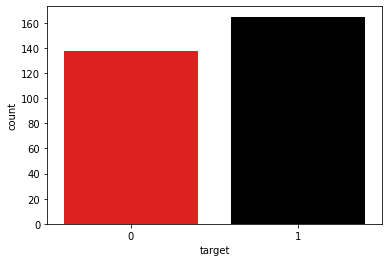

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x= 'target',data = dataset,palette=['red','black'])
plt.show()

<AxesSubplot:>

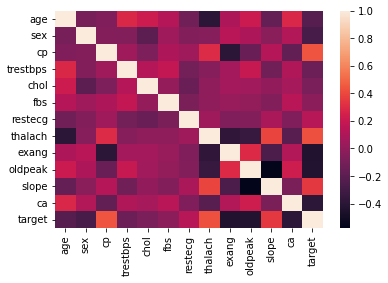

In [6]:
sns.heatmap(dataset.corr())

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Split the data into features (X) and target (y) label sets

In [8]:
dataset.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
target      1.000000
Name: target, dtype: float64

In [9]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [11]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Split the data into a training and test set

In [12]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and Train the Model

In [13]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting the test set results

In [14]:
y_pred = logmodel.predict(X_test)

In [15]:
len(y_pred)

61

In [16]:
y_test.shape

(61, 1)

# Calculating the accuracy

In [17]:
# Solver liblinear
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.819672131147541


In [18]:
# Solver lbfgs
print('Accuracy: %d', (logmodel.score(X_train, y_train)))

Accuracy: %d 0.8347107438016529


# Evaluate model using Confusion Matrix

In [19]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, logmodel.predict(X_train))
print(confusion_matrix)

[[ 84  27]
 [ 13 118]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_train, logmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       111
           1       0.81      0.90      0.86       131

    accuracy                           0.83       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242



In [21]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20  7]
 [ 4 30]]


The result is telling us that we have 20+25 correct predictions and 10+6 incorrect predictions.

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [23]:
logmodel.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
pred_prob_train = pd.DataFrame(logmodel.predict_proba(X_train))
pred_prob_train.columns = ['pbt_not_heart_attack','pbt_heart_attack']
pred_prob_train

,pbt_not_heart_attack,pbt_heart_attack
0,0.017607,0.982393
1,0.099474,0.900526
2,0.101091,0.898909
3,0.240254,0.759746
4,0.376652,0.623348
...,...,...
237,0.990174,0.009826
238,0.853520,0.146480
239,0.121942,0.878058
240,0.131283,0.868717


In [27]:
pred_prob_train.columns = ['pbt_not_heart_attack','pbt_heart_attack']
pred_prob_train

,pbt_not_heart_attack,pbt_heart_attack
0,0.017607,0.982393
1,0.099474,0.900526
2,0.101091,0.898909
3,0.240254,0.759746
4,0.376652,0.623348
...,...,...
237,0.990174,0.009826
238,0.853520,0.146480
239,0.121942,0.878058
240,0.131283,0.868717


In [28]:
logmodel.coef_

array([[ 0.00245623, -1.58354122,  0.70841632, -0.00897394, -0.00467837,
        -0.1644509 ,  0.24682562,  0.02618592, -0.91670945, -0.58261148,
         0.15712301, -0.88489287]])

In [29]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')

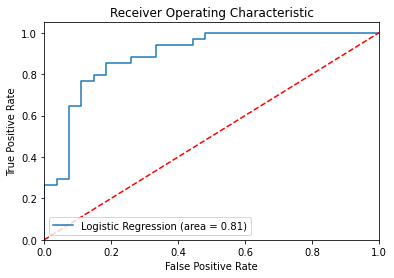

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower left")
plt.savefig('Log_ROC')
plt.show()

In [31]:
logit_roc_auc

0.8115468409586056

Note: The receiver operating characteristic (ROC) curve is used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Judging from this we can say our classifier model was good enough with a 73% Accuracy.